

# TITLE: Analyzing Medicare Claims Data for Multiple Chronic Conditions

#                                                                                               - Group 7
                           

### Introduction:
The Multiple Chronic Conditions dataset contains information about Medicare beneficiaries with two or more chronic conditions, such as diabetes, hypertension, and heart disease. This dataset contains 44,974 records and is obtained from ‘Centers for Medicare & Medicaid Services Data’ website (data.cms.gov). The dataset includes a wide range of variables that can be used to analyze various aspects of healthcare utilization, costs, and outcomes.


### Project Objective:
The objective of this project is to analyze the MCC dataset to understand the relationships between beneficiary demographics, geographic location, chronic conditions, and healthcare utilization and costs.

### Data Description

- Bene_Geo_Lv: The geographic level of the beneficiary's location (e.g. state, county, zip code)
- Bene_Geo_Desc: A description of the geographic area where the beneficiary is located.
- Bene_Geo_Cd: A code that represents the geographic area where the beneficiary is located. 
- Bene_Age_Lvl: The age group of the beneficiary (e.g. 0-17, 18-34, 35-44, 45-54, 55-64, 65+).
- Bene_Demo_Lvl: The demographic level of the beneficiary (e.g. all, male, female, white, black, Hispanic).
- Bene_Demo_Desc: A description of the demographic group to which the beneficiary belongs.
- Bene_MCC: The number of chronic conditions that the beneficiary has (ranging from 2 to 6).
- Prvlnc:Prevalence estimates are calculated by taking the beneficiaries within MCC category divided by the total number of beneficiaries in our fee-for-service population, expressed as a percentage. 
- Tot_Mdcr_Stdzd_Pymt_PC: The standardized Medicare payment per beneficiary per year for all services received.
- Tot_Mdcr_Pymt_PC: The Medicare payment per beneficiary per year for all services received (not standardized).
- Hosp_Readmsn_Rate: The hospital readmission rate per 1,000 beneficiaries.
- ER_Visits_Per_1000_Benes: The number of emergency room visits per 1,000 beneficiaries.

In [28]:
pip install linearmodels

     ---------------------------------------- 1.7/1.7 MB 748.1 kB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 42.1/42.1 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 94.2/94.2 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.32
    Uninstalling Cython-0.29.32:
      Successfully uninstalled Cython-0.29.32
Note: you may need to restart the kernel to use updated packages.


### Data Cleaning

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import geopandas as gpd
import folium


mcc = pd.read_csv('MCC.csv')


In [36]:
mcc.describe()

,Bene_Geo_Cd,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
count,44496.000000,41252.000000,41252.000000,41252.000000,25084.000000,39280.000000
mean,26198.305286,0.249418,13033.192717,13405.274149,0.126327,1027.017721
std,17559.038139,0.085509,11819.119368,12562.935652,0.094767,926.572859
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13036.500000,0.189000,3848.346850,3776.156800,0.057100,345.055850
50%,27010.000000,0.247200,9024.655800,8946.066550,0.110100,690.551000
75%,41047.500000,0.296400,21751.137950,22529.093850,0.206000,1603.838450
max,56999.000000,0.634300,96329.997500,117840.100900,0.500000,11125.000000


In [37]:
mcc.keys()

Index(['Bene_Geo_Lvl', 'Bene_Geo_Desc', 'Bene_Geo_Cd', 'Bene_Age_Lvl',
       'Bene_Demo_Lvl', 'Bene_Demo_Desc', 'Bene_MCC', 'Prvlnc',
       'Tot_Mdcr_Stdzd_Pymt_PC', 'Tot_Mdcr_Pymt_PC', 'Hosp_Readmsn_Rate',
       'ER_Visits_Per_1000_Benes'],
      dtype='object')

In [38]:
#Checking for missing values
print(mcc.isna().sum())


Bene_Geo_Lvl                    0
Bene_Geo_Desc                   0
Bene_Geo_Cd                   480
Bene_Age_Lvl                    0
Bene_Demo_Lvl                   0
Bene_Demo_Desc                  0
Bene_MCC                        0
Prvlnc                       3724
Tot_Mdcr_Stdzd_Pymt_PC       3724
Tot_Mdcr_Pymt_PC             3724
Hosp_Readmsn_Rate           19892
ER_Visits_Per_1000_Benes     5696
dtype: int64


In [39]:
#Removing duplicate rows
mcc = mcc.drop_duplicates()


In [40]:
#Removing Nan values
mcc = mcc.dropna()


### Exploratory Data Analysis

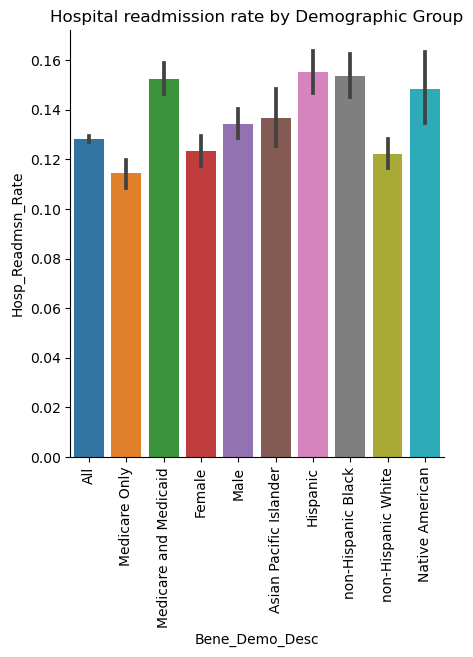

In [7]:
# Bar chart of readmission rate beneficiaries by demographic group
sns.catplot(x="Bene_Demo_Desc", y="Hosp_Readmsn_Rate", kind="bar", data=mcc)
plt.title("Hospital readmission rate by Demographic Group")
plt.xticks(rotation=90)
plt.show()

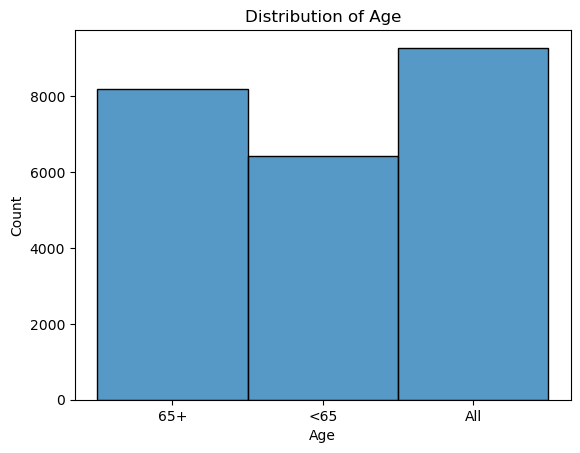

In [8]:

# Histogram of age
sns.histplot(mcc['Bene_Age_Lvl'], bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\keert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


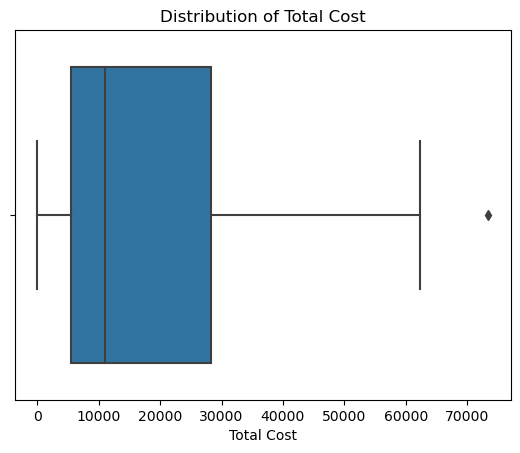

In [9]:
# Box plot of total cost
sns.boxplot(mcc['Tot_Mdcr_Stdzd_Pymt_PC'])
plt.title('Distribution of Total Cost')
plt.xlabel('Total Cost')
plt.show()

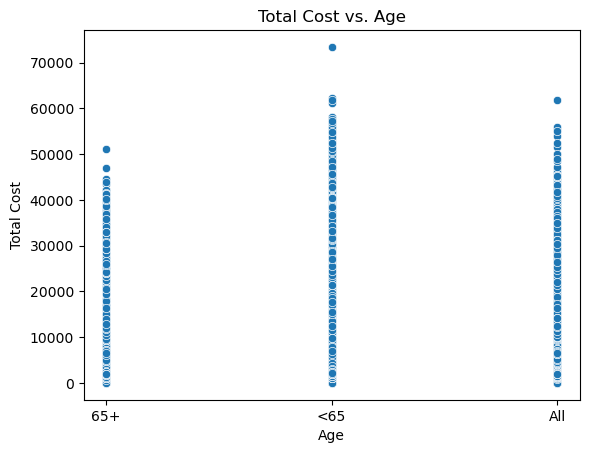

In [10]:
# Scatter plot of cost vs. age
sns.scatterplot(x=mcc['Bene_Age_Lvl'], y=mcc['Tot_Mdcr_Stdzd_Pymt_PC'])
plt.title('Total Cost vs. Age')
plt.xlabel('Age')
plt.ylabel('Total Cost')
plt.show()

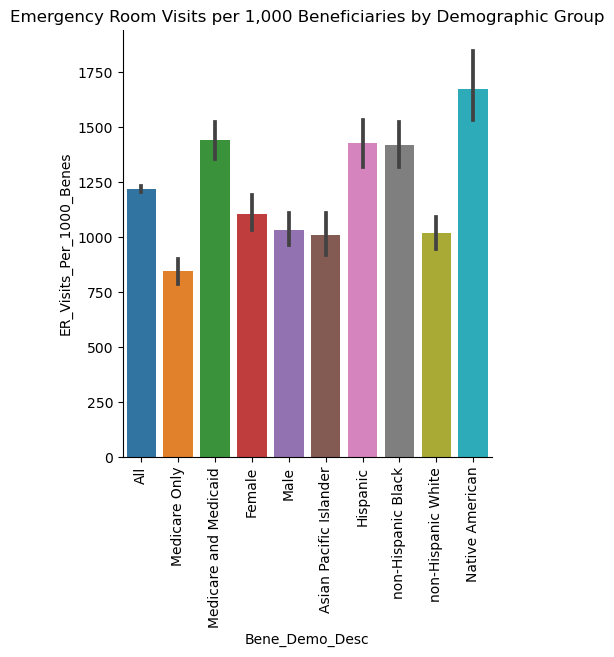

In [11]:
# Bar chart of emergency room visits per 1,000 beneficiaries by demographic group
sns.catplot(x="Bene_Demo_Desc", y="ER_Visits_Per_1000_Benes", kind="bar", data=mcc)
plt.title("Emergency Room Visits per 1,000 Beneficiaries by Demographic Group")
plt.xticks(rotation=90)
plt.show()

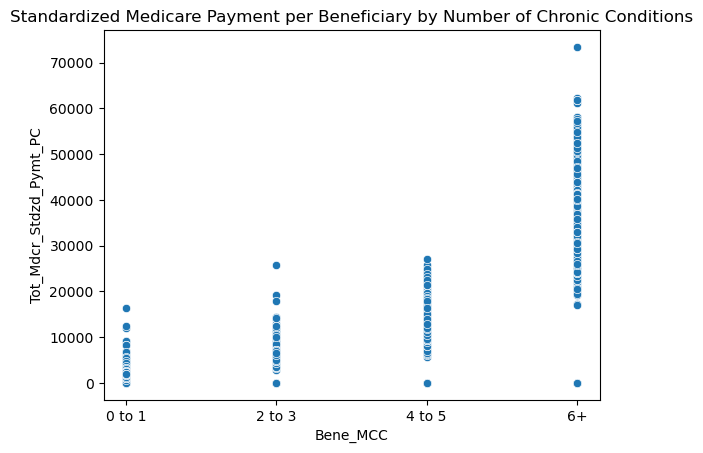

In [12]:
# Scatter plot of standardized Medicare payment per beneficiary by number of chronic conditions
sns.scatterplot(x="Bene_MCC", y="Tot_Mdcr_Stdzd_Pymt_PC", data=mcc)
plt.title("Standardized Medicare Payment per Beneficiary by Number of Chronic Conditions")
plt.show()

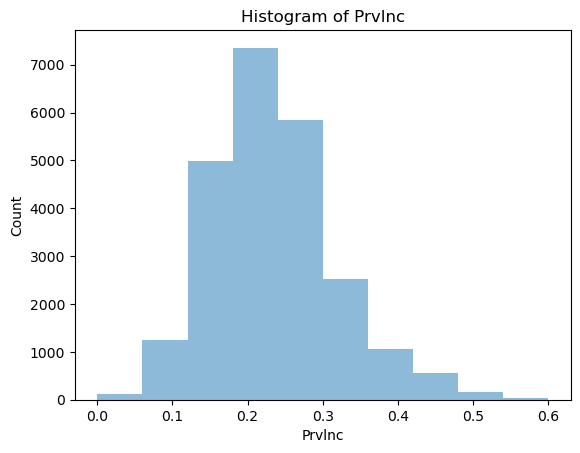

In [13]:
# create a histogram of the Prvlnc variable
plt.hist(mcc["Prvlnc"], bins=10, alpha=0.5)
plt.xlabel("Prvlnc")
plt.ylabel("Count")
plt.title("Histogram of Prvlnc")
plt.show()

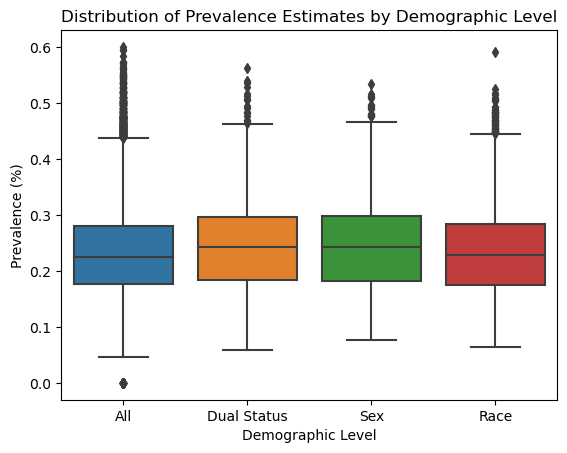

In [14]:
sns.boxplot(x='Bene_Demo_Lvl', y='Prvlnc', data=mcc)
plt.xlabel('Demographic Level')
plt.ylabel('Prevalence (%)')
plt.title('Distribution of Prevalence Estimates by Demographic Level')
plt.show()


### Descriptive Statistics

In [15]:
# Calculate descriptive statistics for key variables
stats = mcc[['Tot_Mdcr_Stdzd_Pymt_PC','Prvlnc', 'Hosp_Readmsn_Rate', 'ER_Visits_Per_1000_Benes']].describe()

# Print the statistics
print(stats)

       Tot_Mdcr_Stdzd_Pymt_PC        Prvlnc  Hosp_Readmsn_Rate  \
count            23899.000000  23899.000000       23899.000000   
mean             15927.286940      0.234274           0.129676   
std              12497.583703      0.082579           0.093571   
min                  0.000000      0.000000           0.000000   
25%               5420.159550      0.177200           0.062400   
50%              11056.119800      0.226600           0.112900   
75%              28223.667500      0.283100           0.207500   
max              73442.264600      0.600200           0.500000   

       ER_Visits_Per_1000_Benes  
count              23899.000000  
mean                1213.234915  
std                  980.936637  
min                    0.000000  
25%                  407.170950  
50%                  839.092700  
75%                 1869.194850  
max                 5679.245300  


### Data Models 

#### OLS Model for Hospital Readmission Rate

In [25]:
dummies1 = pd.get_dummies(mcc['Bene_Age_Lvl'], prefix='Bene_Age_Lvl')
mcc = pd.concat([mcc, dummies1], axis=1)
print(mcc)

dummies2 = pd.get_dummies(mcc['Bene_Demo_Lvl'], prefix='Bene_Demo_Lvl')
mcc = pd.concat([mcc, dummies2], axis=1)
print(mcc)

dummies3 = pd.get_dummies(mcc['Bene_Demo_Desc'], prefix='Bene_Demo_Desc')
mcc = pd.concat([mcc, dummies3], axis=1)
print(mcc)

dummies4 = pd.get_dummies(mcc['Bene_MCC'], prefix='Bene_MCC')
mcc = pd.concat([mcc, dummies4], axis=1)
print(mcc)


mcc = mcc.drop(['Bene_Age_Lvl', 'Bene_Demo_Lvl','Bene_Demo_Desc','Bene_MCC'], axis = 1)

      Bene_Geo_Lvl         Bene_Geo_Desc  Bene_Geo_Cd Bene_Age_Lvl  \
0            State               Alabama          1.0          65+   
1            State               Alabama          1.0          65+   
2            State               Alabama          1.0          65+   
3            State               Alabama          1.0          65+   
4            State               Alabama          1.0          65+   
...            ...                   ...          ...          ...   
44954       County  Wyoming : Sweetwater      56037.0          65+   
44955       County  Wyoming : Sweetwater      56037.0          65+   
44960       County       Wyoming : Uinta      56041.0          65+   
44963       County       Wyoming : Uinta      56041.0          65+   
44971       County    Wyoming : Washakie      56043.0          65+   

      Bene_Demo_Lvl Bene_Demo_Desc Bene_MCC  Prvlnc  Tot_Mdcr_Stdzd_Pymt_PC  \
0               All            All   0 to 1  0.2273               2079.0975   
1

In [26]:
y = mcc['Hosp_Readmsn_Rate']
x3 = mcc.drop(['Prvlnc','Hosp_Readmsn_Rate','Tot_Mdcr_Pymt_PC','Bene_Geo_Lvl','Tot_Mdcr_Stdzd_Pymt_PC','Bene_Geo_Desc','Prvlnc','Bene_Age_Lvl_All','Bene_Demo_Lvl_All','Bene_Demo_Desc_All','Bene_MCC_6+','Bene_Demo_Lvl_Dual Status','Bene_Demo_Lvl_Sex','Prvlnc','Bene_MCC_0 to 1'], axis = 1)
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x3, y, test_size=0.2, random_state=0)

<AxesSubplot:>

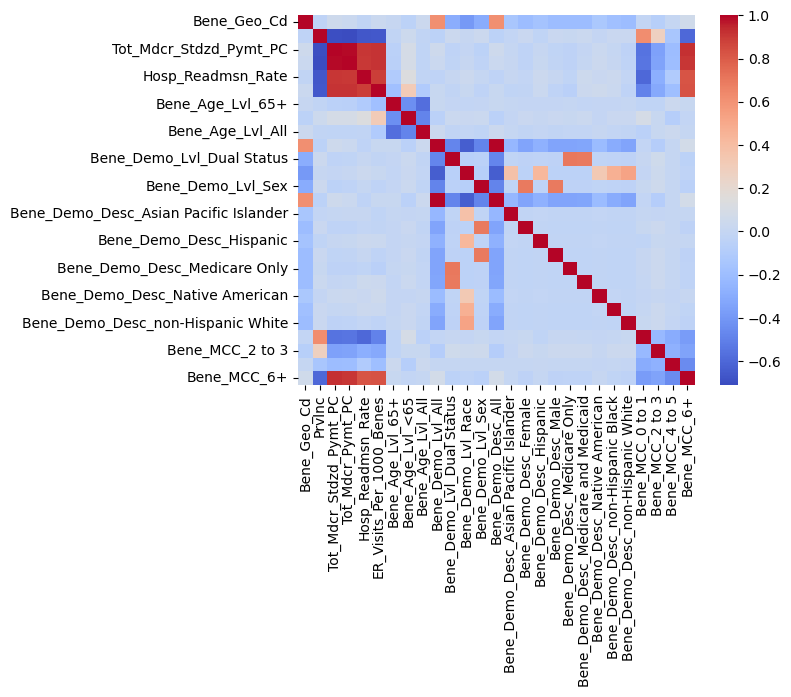

In [27]:
# Create a correlation matrix
import seaborn as sns
corr_matrix3 = mcc.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix3, cmap='coolwarm')

In [28]:
import statsmodels.api as sm

# create linear regression object
model_OLS = sm.OLS(y_train, x_train)

# fit the model
results = model_OLS.fit()

# print summary of regression results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Hosp_Readmsn_Rate   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                          1.935e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):                        0.00
Time:                        16:51:26   Log-Likelihood:                          34499.
No. Observations:               19119   AIC:                                 -6.897e+04
Df Residuals:                   19104   BIC:                                 -6.885e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Bene_Geo_Cd                            1.446e-07   1.57e-08      9.222      0.000    1.14e-07    1.75e-07
ER_Visits_Per_1000_Benes               9.763e-05   2.98e-07    327.516      0.000     9.7e-05    9.82e-05
Bene_Age_Lvl_65+                          0.0067      0.001     10.728      0.000       0.005       0.008
Bene_Age_Lvl_<65                         -0.0333      0.001    -44.842      0.000      -0.035      -0.032
Bene_Demo_Lvl_Race                        0.0114      0.001     11.800      0.000       0.010       0.013
Bene_Demo_Desc_Asian Pacific Islander     0.0267      0.002     11.929      0.000       0.022       0.031
Bene_Demo_Desc_Female                     0.0136      0.002      7.206      0.000       0.010       0.017
Bene_Demo_Desc_Hispanic                   0.0008      0.002      0.423      0.673      -0.003       0.005
Bene_Demo_Desc_Male                       0.0320      0.002     16.883      0.000       0.028       0.036
Bene_Demo_Desc_Medicare Only              0.0290      0.002     15.120      0.000       0.025       0.033
Bene_Demo_Desc_Medicare and Medicaid      0.0104      0.002      5.277      0.000       0.007       0.014
Bene_Demo_Desc_Native American           -0.0285      0.003    -11.242      0.000      -0.034      -0.024
Bene_Demo_Desc_non-Hispanic Black         0.0024      0.002      1.290      0.197      -0.001       0.006
Bene_Demo_Desc_non-Hispanic White         0.0100      0.002      5.836      0.000       0.007       0.013
Bene_MCC_2 to 3                           0.0179      0.001     22.475      0.000       0.016       0.020
Bene_MCC_4 to 5                           0.0230      0.001     34.743      0.000       0.022       0.024
==============================================================================
Omnibus:                     1459.439   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6429.620
Skew:                          -0.253   Prob(JB):                         0.00
Kurtosis:                       5.795   Cond. No.                     3.15e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.75e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Handling Endogenity

In [32]:
import statsmodels.api as sm

# Define the endogenous variable (dependent variable)
y = mcc['Hosp_Readmsn_Rate']

# Define the exogenous variables (independent variables)
x = mcc[['Prvlnc', 'Tot_Mdcr_Stdzd_Pymt_PC', 'Tot_Mdcr_Pymt_PC']]

# Define instrumental variables (Z) that are correlated with healthcare utilization but not directly related to healthcare costs or chronic conditions
# For example, distance to healthcare facilities
Z = x_train['ER_Visits_Per_1000_Benes']

# Fit instrumental variables regression model
model_iv = sm.OLS(y_train, sm.add_constant(x_train)).fit(cov_type='HC1', instrument=sm.add_constant(Z))

# Print regression results
print(model_iv.summary())


                            OLS Regression Results                            
Dep. Variable:      Hosp_Readmsn_Rate   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     3595.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        16:54:10   Log-Likelihood:                 34791.
No. Observations:               19119   AIC:                        -6.955e+04
Df Residuals:                   19103   BIC:                        -6.942e+04
Df Model:                          15                                         
Covariance Type:                  HC1                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

C:\Users\keert\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 15
  warnings.warn('covariance of constraints does not have full '


In [65]:
#Prediction and Accuracy
pred = results.predict()
pred

array([0.1992821 , 0.21678298, 0.08477576, ..., 0.21159431, 0.05895519,
       0.06143566])

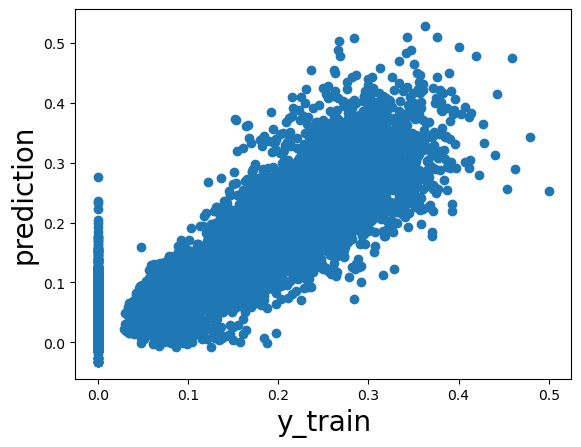

In [66]:
#Scatter Plot of y_train and Prediction
plt.scatter(y_train,pred)
plt.xlabel('y_train',fontsize=20)
plt.ylabel('prediction',fontsize=20)
plt.show()

In [67]:
#MSE of training
mse_train = mean_squared_error(y_train,pred)
print('Mean Squared Error:', mse_train)

Mean Squared Error: 0.001585696867212733


In [68]:
#Prediction of test data
pred_test = results.predict(x_test)
pred_test

12522    0.112256
42499    0.133093
8642     0.096216
44334    0.131454
21663    0.464255
           ...   
21936    0.002559
22075    0.216691
44286    0.122388
2939     0.265179
170      0.118982
Length: 4780, dtype: float64

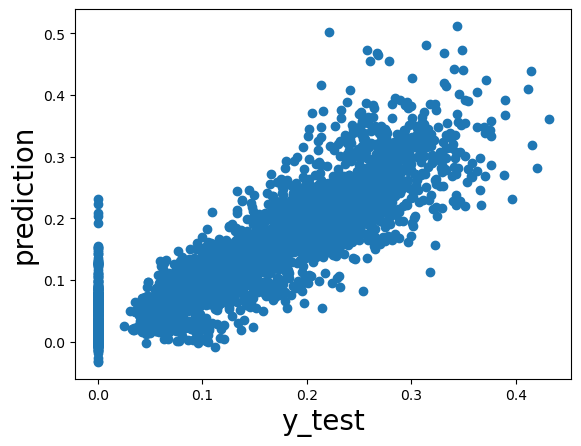

In [69]:
#Scatter Plot of y_test and Prediction
plt.scatter(y_test,pred_test)
plt.xlabel('y_test',fontsize=20)
plt.ylabel('prediction',fontsize=20)
plt.show()

In [70]:
#MSE of test data
mse_test = mean_squared_error(y_test, pred_test)
print('Mean squared error:', mse_test)

Mean squared error: 0.0016587505763829256


#### Robustness Checks

In [41]:


# 1. Different Model Specifications
# Define alternative sets of control variables or functional forms
x_alt1 = mcc[['Prvlnc', 'Tot_Mdcr_Stdzd_Pymt_PC', 'ER_Visits_Per_1000_Benes']]
x_alt2 = mcc[['Prvlnc', 'Tot_Mdcr_Pymt_PC', 'ER_Visits_Per_1000_Benes']]

# Estimate regression models using alternative specifications
model_alt1 = sm.OLS(y, sm.add_constant(x_alt1)).fit()
model_alt2 = sm.OLS(y, sm.add_constant(x_alt2)).fit()

# 2. Subset Analysis (Example: Age Group)
# Subset the dataset based on age groups
subset_65plus = mcc[mcc['Bene_Age_Lvl'] == '65+']
subset_under65 = mcc[mcc['Bene_Age_Lvl'] != '65+']

# Estimate regression models separately for each subset
model_subset_65plus = sm.OLS(subset_65plus['Hosp_Readmsn_Rate'], sm.add_constant(subset_65plus[['Prvlnc', 'ER_Visits_Per_1000_Benes']])).fit()
model_subset_under65 = sm.OLS(subset_under65['Hosp_Readmsn_Rate'], sm.add_constant(subset_under65[['Prvlnc', 'ER_Visits_Per_1000_Benes']])).fit()

# Print results of alternative specifications and subset analyses
print("Alternative Specification 1:")
print(model_alt1.summary())
print("\nAlternative Specification 2:")
print(model_alt2.summary())
print("\nSubset Analysis - Age Group: 65+")
print(model_subset_65plus.summary())
print("\nSubset Analysis - Age Group: Under 65")
print(model_subset_under65.summary())

# 3. Heteroscedasticity-Robust Standard Errors
# Estimate the regression model with heteroscedasticity-robust standard errors
model_hc1 = sm.OLS(y, sm.add_constant(x)).fit(cov_type='HC1')
print("\nOLS Regression with Heteroscedasticity-Robust Standard Errors:")
print(model_hc1.summary())

# 4. Bootstrapping (Example: Bootstrap Standard Errors)
# Perform bootstrap resampling and estimate regression model
model_bootstrap = sm.OLS(y, sm.add_constant(x)).fit(cov_type='HC1', use_t=None).get_robustcov_results()
print("\nOLS Regression with Bootstrapped Standard Errors:")
print(model_bootstrap.summary())

# 5. Outlier Analysis (Example: Robust Regression)
# Estimate robust regression model using M-estimation to reduce influence of outliers
model_robust = sm.RLM(y, sm.add_constant(x), M=sm.robust.norms.TukeyBiweight()).fit()
print("\nRobust Regression Model:")
print(model_robust.summary())

# 6. Specification Tests (Example: Ramsey RESET Test)
# Perform Ramsey RESET test for model specification
reset_test = sm.stats.diagnostic.linear_reset(model_iv)
print("\nRamsey RESET Test:")
print(reset_test.summary())


Alternative Specification 1:
                            OLS Regression Results                            
Dep. Variable:      Hosp_Readmsn_Rate   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 4.371e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        17:03:23   Log-Likelihood:                 45052.
No. Observations:               23899   AIC:                        -9.010e+04
Df Residuals:                   23895   BIC:                        -9.006e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------


Robust Regression Model:
                    Robust linear Model Regression Results                    
Dep. Variable:      Hosp_Readmsn_Rate   No. Observations:                23899
Model:                            RLM   Df Residuals:                    23895
Method:                          IRLS   Df Model:                            3
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 01 May 2024                                         
Time:                        17:03:23                                         
No. Iterations:                    18                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
co

C:\Users\keert\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


#### Random Forest Model for Hospital Readmission Rate

In [71]:
from sklearn.ensemble import RandomForestRegressor
# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [72]:
#Prediction
y_pred = rf_model.predict(x_test)

In [73]:
mse_rf = mean_squared_error(y_test, y_pred)
print('MSE of Random Forest Model:', mse_rf)

MSE of Random Forest Model: 0.0011021515531993724


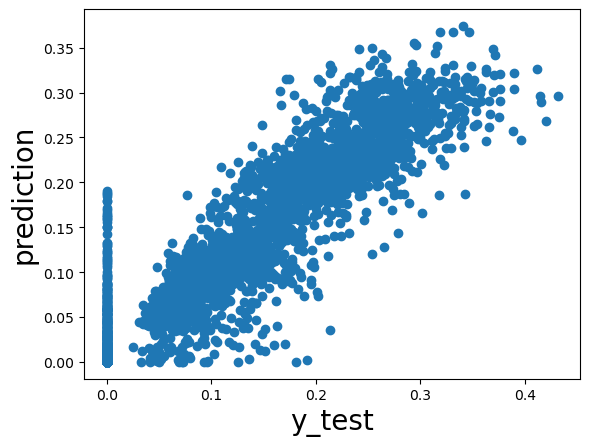

In [74]:
#Scatter Plot of y_test and Prediction
plt.scatter(y_test,y_pred)
plt.xlabel('y_test',fontsize=20)
plt.ylabel('prediction',fontsize=20)
plt.show()

#### Support Vector Machine for Hospital Readmission Rate

In [75]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

# Train the model
svr_model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
svr_model.fit(x_scaled, y_train)


SVR(C=10, gamma=0.1)

In [76]:
# Test the model
x_scaled_test = scaler.fit_transform(x_test)
y_pred_svr = svr_model.predict(x_scaled_test)

In [77]:

mse_svr = mean_squared_error(y_test, y_pred_svr)
print('MSE of Support Vector Machine:', mse_svr)

MSE of Support Vector Machine: 0.0025726103131211153


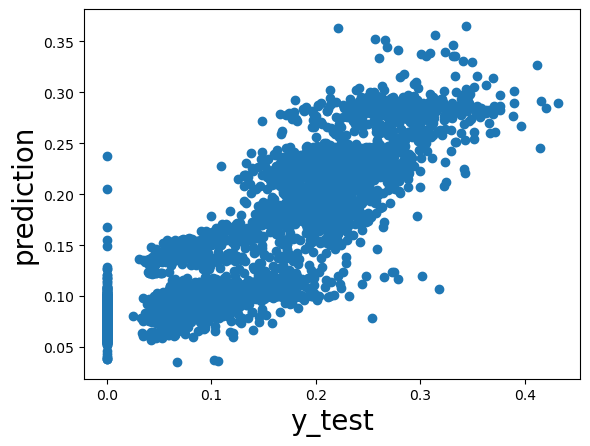

In [78]:
#Scatter Plot of y_test and Prediction
plt.scatter(y_test,y_pred_svr)
plt.xlabel('y_test',fontsize=20)
plt.ylabel('prediction',fontsize=20)
plt.show()

#### Decision Tree Regression for Hospital Readmission rate

In [79]:
from sklearn.tree import DecisionTreeRegressor

# Create Decision Tree Regressor object
dt = DecisionTreeRegressor()

# Fit the model with training data
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [80]:
# Predict the values for test data
y_pred_dt = dt.predict(x_test)

In [81]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
print('MSE of Decision Tree Regression:', mse_dt)

MSE of Decision Tree Regression: 0.0019322089832635983


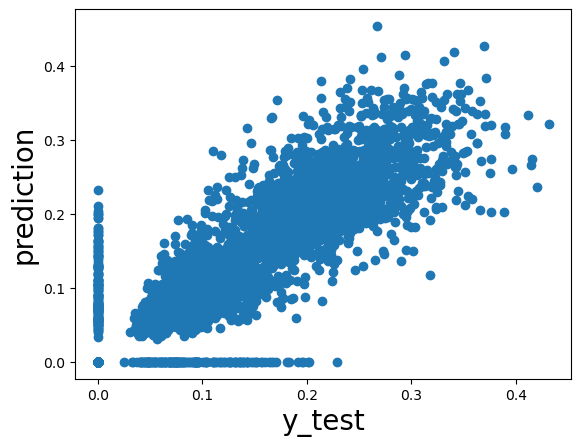

In [82]:
#Scatter Plot of y_test and Prediction
plt.scatter(y_test,y_pred_dt)
plt.xlabel('y_test',fontsize=20)
plt.ylabel('prediction',fontsize=20)
plt.show()